# New ML Run 2/27/23

In [1]:
import os
os.environ["SPS_HOME"] = '/global/homes/e/eramey16/fsps/'

import numpy as np
import pandas as pd
# import util
import matplotlib.pyplot as plt
# import util

from sqlalchemy import create_engine, Column, Table, MetaData, insert
from sqlalchemy.types import BIGINT, FLOAT, REAL, VARCHAR, BOOLEAN


data_dir = "/pscratch/sd/e/eramey16/data/monocle/cosmos_160/"
seed = 42

conn_string = 'postgresql+psycopg2://lensed_db_admin@nerscdb03.nersc.gov/lensed_db'
from ML_final_model import ModelTrainer

/global/homes/e/eramey16/.conda/envs/astroconda/lib/python3.12/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/global/homes/e/eramey16/.conda/envs/astroconda/lib/python3.12/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. 

In [2]:
x = pd.DataFrame({'f1':[1, 2, 3], 'f2':[4, 5, 6]})

mt = ModelTrainer(model_type='XGB', tbl_name='lrg_train')
x_aug = mt._augment_data(x)

train_idx = np.array([1, 2])
x_aug[x_aug.aug_idx.isin(train_idx)]

TypeError: ModelTrainer.__init__() missing 1 required positional argument: 'model_params'

In [ ]:
y_pred_proba = np.array([.6, .1, .8]).reshape(1, -1)
thresh = np.array([.5, .6, .7, .8], ndmin=2).reshape(-1,1)
y_pred = y_pred_proba > thresh
y_pred.shape, y_pred_proba.shape, thresh.shape

y_true = np.array([1, 0, 0]).reshape(1, -1)
tp = y_true & y_pred
tn = ~y_true & ~y_pred
fp = ~y_true & y_pred
fn = y_true & ~y_pred
y_pred, fp, fn
np.sum(fp, axis=1)

array([1, 1, 1, 0])

In [16]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = np.array(confusion_matrix([1, 0, 1, 1], [1, 0, 0, 1])).astype(int).ravel()

In [17]:
tn, fp, fn, tp

(np.int64(1), np.int64(0), np.int64(1), np.int64(2))

##### Downloaded galaxies from 6 degrees around RA 160 DEC 2
[DESI Legacy Survey](https://datalab.noirlab.edu/query.php?name=ls_dr9.photo_z)
query:
```
SELECT trac.ls_id, trac.ra, trac.dec, trac.type, trac.dered_mag_g, trac.dered_mag_r, trac.dered_mag_z, trac.dered_mag_w1, trac.dered_mag_w2,
trac.dered_flux_g, trac.dered_flux_r, trac.dered_flux_z, trac.dered_flux_w1, trac.dered_flux_w2,
trac.snr_g, trac.snr_r, trac.snr_z, trac.snr_w1, trac.snr_w2,
trac.flux_ivar_g, trac.flux_ivar_r, trac.flux_ivar_z, trac.flux_ivar_w1, trac.flux_ivar_w2,
trac.dchisq_1, trac.dchisq_2, trac.dchisq_3, trac.dchisq_4, trac.dchisq_5,
trac.rchisq_g, trac.rchisq_r, trac.rchisq_z, trac.rchisq_w1, trac.rchisq_w2,
trac.sersic, trac.sersic_ivar,
trac.psfsize_g, trac.psfsize_r, trac.psfsize_z,
trac.shape_r, trac.shape_e1, trac.shape_e2,
trac.shape_r_ivar, trac.shape_e1_ivar, trac.shape_e2_ivar,
phot_z.z_phot_median, phot_z.z_phot_std, phot_z.z_spec
FROM ls_dr9.tractor AS trac
INNER JOIN ls_dr9.photo_z AS phot_z ON trac.ls_id = phot_z.ls_id
WHERE (q3c_radial_query(ra,dec, 160, 2, 6))
AND NOT trac.type='PSF'
AND NOT trac.type='DUP'
ORDER BY trac.random_id
```

In [4]:
engine = create_engine(conn_string)
conn = engine.connect()

existing = pd.DataFrame(conn.execute("SELECT * from bookkeeping WHERE tag='run2'"))

In [5]:
# iptf16 = pd.read_csv("iptf16geu.dat")
# iptf16 = util.clean_and_calc(iptf16, mode='dr9')
# iptf16

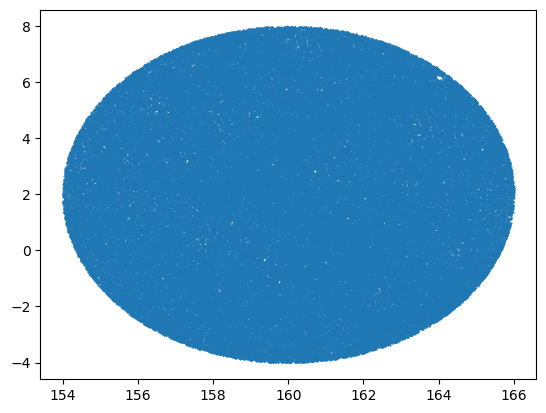

In [6]:
all_galaxies = pd.read_csv(data_dir+"dr9_160_2_6deg.dat")
plt.plot(all_galaxies.ra, all_galaxies.dec, '.', ms=1)

idxs = all_galaxies.loc[all_galaxies.ls_id.isin(list(existing.ls_id))].index
all_galaxies.drop(index=idxs, inplace=True)

In [7]:
all_galaxies.columns

Index(['ls_id', 'ra', 'dec', 'type', 'dered_mag_g', 'dered_mag_r',
       'dered_mag_z', 'dered_mag_w1', 'dered_mag_w2', 'dered_flux_g',
       'dered_flux_r', 'dered_flux_z', 'dered_flux_w1', 'dered_flux_w2',
       'snr_g', 'snr_r', 'snr_z', 'snr_w1', 'snr_w2', 'flux_ivar_g',
       'flux_ivar_r', 'flux_ivar_z', 'flux_ivar_w1', 'flux_ivar_w2',
       'dchisq_1', 'dchisq_2', 'dchisq_3', 'dchisq_4', 'dchisq_5', 'rchisq_g',
       'rchisq_r', 'rchisq_z', 'rchisq_w1', 'rchisq_w2', 'sersic',
       'sersic_ivar', 'psfsize_g', 'psfsize_r', 'psfsize_z', 'shape_r',
       'shape_e1', 'shape_e2', 'shape_r_ivar', 'shape_e1_ivar',
       'shape_e2_ivar', 'z_phot_median', 'z_phot_std', 'z_spec'],
      dtype='object')

In [6]:
db_cols = all_galaxies.columns
clean_galaxies = util.clean_and_calc(all_galaxies, mode='dr9')
clean_galaxies = clean_galaxies.sample(n=10000, random_state=seed).reset_index(drop=True)
clean_galaxies = clean_galaxies[db_cols]

/global/homes/e/eramey16/.conda/envs/myprospector/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [7]:
engine = create_engine(conn_string)
conn = engine.connect()

util.bookkeeping_setup(conn, 'cosmos_160', clean_galaxies, tag='run3')

In [9]:
pd.DataFrame(conn.execute("SELECT * from bookkeeping WHERE tag='run3'"))

,id,tbl_id,tbl_name,ls_id,created,stage,tag
0,10072,10071,cosmos_160,9906621458417958,2023-07-28 05:48:54.925972,1,run3
1,10073,10072,cosmos_160,9906623439897590,2023-07-28 05:48:54.930024,1,run3
2,10074,10073,cosmos_160,9906623157242472,2023-07-28 05:48:54.934167,1,run3
3,10075,10074,cosmos_160,9906620894021018,2023-07-28 05:48:54.938705,1,run3
4,10076,10075,cosmos_160,9906623438193988,2023-07-28 05:48:54.942788,1,run3
...,...,...,...,...,...,...,...
9995,19997,19996,cosmos_160,9906620609135285,2023-07-28 05:49:38.987859,1,run3
9996,19998,19997,cosmos_160,9906621081126238,2023-07-28 05:49:38.994334,1,run3
9997,19999,19998,cosmos_160,9906624097358565,2023-07-28 05:49:38.998310,1,run3
9998,20000,19999,cosmos_160,9906622685316609,2023-07-28 05:49:39.002418,1,run3


In [11]:
# util.write_table(clean_galaxies, 'cosmos_160')

In [6]:
conn.execute("SELECT * from cosmos_160").first()

(9906621743042266, 162.910029571106, 0.81542817820044, 'REX', 23.42378, 22.469233, 21.555038, 20.804296, 21.673061, 0.427059, 1.028744, 2.387727, 4.767399, 2.141782, 14.504388, 22.860104, 25.552435, 8.278383, 1.702473, 1527.4186, 596.59454, 127.30318, 3.064141, 0.638112, 1297.0767, 1389.1155, 1384.5988, 1395.198, 0.0, 0.982051, 0.876592, 1.034885, 0.561166, 0.506167, 1.0, 0.0, 1.39972, 1.306459, 1.392947, 0.364783, 0.0, 0.0, 1755.2955, 0.0, 0.0, 0.698765, 0.079279, -99.0, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 1)

In [11]:
conn.close()

### Running classify

In [3]:
import os
os.environ["SPS_HOME"] = '/global/homes/e/eramey16/fsps/'
from docker import classify
import util
import sqlalchemy
import pandas as pd
import numpy as np

In [4]:
bkdata, tbldata = classify.get_galaxy(ls_id=9906621743042266)
gal_data = tbldata.iloc[0]

              ls_id         ra       dec type  dered_mag_g  dered_mag_r  \
0  9906621743042266  157.57194  0.133419  REX    24.328535    22.720818   

   dered_mag_z  dered_mag_w1  dered_mag_w2  dered_flux_g  ...  \
0    21.042824     19.494946     19.849274      0.185603  ...   

   massmet_2_sig_minus  logtmax_sig_minus  dust2_sig_plus  tau_sig_plus  \
0             0.168063            0.12496        0.271059      0.058755   

   massmet_1_sig_plus  massmet_2_sig_plus  logtmax_sig_plus  chisq_maggies  \
0            0.018265            0.093826          0.069723       1.299882   

   lensed  id  
0   False   1  

[1 rows x 81 columns]


In [3]:
# tbldata

In [4]:
gal_data.z_phot_median

0.698765

In [5]:
bands = ['g', 'r', 'z', 'w1', 'w2']

print([gal_data[f'dered_mag_{b}'] for b in bands])

[23.42378, 22.469233, 21.555038, 20.804296, 21.673061]


In [6]:
print([ 2.5 / (np.log(10) * gal_data['dered_flux_'+b] * 
                        np.sqrt(gal_data['flux_ivar_'+b])) for b in bands])

[0.06505151325479806, 0.04320931361045458, 0.04030138982839337, 0.1301033400196666, 0.6346007773114765]


In [7]:
h5_file = "/global/cscratch1/sd/eramey16/data/dr9_training/unlensed_02_23/9906621743042266.h5"
gal_data = classify.merge_prospector(tbldata, h5_file=h5_file)

Object found: 9906621743042266
Redshift: 0.698765


In [8]:
mfile = "/global/homes/e/eramey16/galactic_lenses/gridsearch_models/gridsearch_2023-02-15.sav"
pred = classify.predict(gal_data, model_file=mfile)
gal_data['lensed'] = pred

In [9]:
# classify.update_db(bkdata, gal_data)

In [5]:
engine = sqlalchemy.create_engine(util.conn_string)
conn = engine.connect()

In [10]:
test = pd.DataFrame(conn.execute("SELECT * from cosmos_160 where lensed=True"))

In [11]:
test

,ls_id,ra,dec,type,dered_mag_g,dered_mag_r,dered_mag_z,dered_mag_w1,dered_mag_w2,dered_flux_g,...,massmet_2_sig_minus,logtmax_sig_minus,dust2_sig_plus,tau_sig_plus,massmet_1_sig_plus,massmet_2_sig_plus,logtmax_sig_plus,chisq_maggies,lensed,id
0,9906622402791813,159.581748,2.547192,SER,19.782999,17.872572,16.938925,16.206629,16.706660,12.212389,...,0.000025,0.002147,0.002401,0.000799,0.000027,0.000057,0.002231,11530.130463,True,6455
1,9906622212606180,154.133249,2.119651,SER,21.148910,19.508450,18.198864,17.186222,17.651478,3.470851,...,0.003321,0.005541,0.004166,0.002871,0.003226,0.007004,0.005414,1272.848382,True,4738
2,9906622118366694,154.695609,1.720285,SER,19.938427,18.118086,17.237190,16.630999,17.110907,10.583494,...,0.000089,0.002302,0.003561,0.001415,0.000033,0.000191,0.002715,6085.208733,True,1089


In [6]:
conn.execute("SELECT * from bookkeeping where id=1")

(1, 1, 'cosmos_160', 9906621743042266, datetime.datetime(2023, 3, 7, 0, 13, 7, 456273), 2, 'run2')

In [9]:
import sqlalchemy
sqlalchemy.__version__

'1.4.32'

In [17]:
import pandas
pandas.__version__

'1.4.2'

In [1]:
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool
engine = create_engine(util.conn_string, poolclass=NullPool)
with engine.connect() as conn:
        conn.execute("SELECT pg_terminate_backend(pid) FROM pg_stat_get_activity(NULL::integer)" \
                     " WHERE datid=(SELECT oid from pg_database where datname = 'lensed_db');")

ModuleNotFoundError: No module named 'h5py'

### Prepping a run

In [1]:
import prep_run
import make_runit

In [2]:
prep_run.prep_run(dest='/pscratch/sd/e/eramey16/data/monocle/cosmos_160/', batch=10)

File created: /pscratch/sd/e/eramey16/data/monocle/cosmos_160/tasks_0.txt
File created: /pscratch/sd/e/eramey16/data/monocle/cosmos_160/tasks_1.txt
File created: /pscratch/sd/e/eramey16/data/monocle/cosmos_160/tasks_2.txt
File created: /pscratch/sd/e/eramey16/data/monocle/cosmos_160/tasks_3.txt
File created: /pscratch/sd/e/eramey16/data/monocle/cosmos_160/tasks_4.txt
File created: /pscratch/sd/e/eramey16/data/monocle/cosmos_160/tasks_5.txt
File created: /pscratch/sd/e/eramey16/data/monocle/cosmos_160/tasks_6.txt
File created: /pscratch/sd/e/eramey16/data/monocle/cosmos_160/tasks_7.txt
File created: /pscratch/sd/e/eramey16/data/monocle/cosmos_160/tasks_8.txt
File created: /pscratch/sd/e/eramey16/data/monocle/cosmos_160/tasks_9.txt


In [2]:
for i in range(10):
    taskfile = f'tasks_{i}.txt'
    make_runit.make_runit('/pscratch/sd/e/eramey16/data/monocle/cosmos_160/', '12:00:00', 20, 64,
                      'cpu', taskfile, tag=i)

File created: /pscratch/sd/e/eramey16/data/monocle/cosmos_160/runit0
File created: /pscratch/sd/e/eramey16/data/monocle/cosmos_160/runit1
File created: /pscratch/sd/e/eramey16/data/monocle/cosmos_160/runit2
File created: /pscratch/sd/e/eramey16/data/monocle/cosmos_160/runit3
File created: /pscratch/sd/e/eramey16/data/monocle/cosmos_160/runit4
File created: /pscratch/sd/e/eramey16/data/monocle/cosmos_160/runit5
File created: /pscratch/sd/e/eramey16/data/monocle/cosmos_160/runit6
File created: /pscratch/sd/e/eramey16/data/monocle/cosmos_160/runit7
File created: /pscratch/sd/e/eramey16/data/monocle/cosmos_160/runit8
File created: /pscratch/sd/e/eramey16/data/monocle/cosmos_160/runit9


# Query for IPTF16geu:
ls_id = 9906619143751091

SELECT trac.ls_id, trac.ra, trac.dec, trac.type, trac.dered_mag_g, trac.dered_mag_r, trac.dered_mag_z, trac.dered_mag_w1, trac.dered_mag_w2,
trac.dered_flux_g, trac.dered_flux_r, trac.dered_flux_z, trac.dered_flux_w1, trac.dered_flux_w2,
trac.snr_g, trac.snr_r, trac.snr_z, trac.snr_w1, trac.snr_w2,
trac.flux_ivar_g, trac.flux_ivar_r, trac.flux_ivar_z, trac.flux_ivar_w1, trac.flux_ivar_w2,
trac.dchisq_1, trac.dchisq_2, trac.dchisq_3, trac.dchisq_4, trac.dchisq_5,
trac.rchisq_g, trac.rchisq_r, trac.rchisq_z, trac.rchisq_w1, trac.rchisq_w2,
trac.sersic, trac.sersic_ivar,
trac.psfsize_g, trac.psfsize_r, trac.psfsize_z,
trac.shape_r, trac.shape_e1, trac.shape_e2,
trac.shape_r_ivar, trac.shape_e1_ivar, trac.shape_e2_ivar,
phot_z.z_phot_median, phot_z.z_phot_std, phot_z.z_spec
FROM ls_dr9.tractor AS trac
INNER JOIN ls_dr9.photo_z AS phot_z ON trac.ls_id = phot_z.ls_id
WHERE ls_id=9906619143751091
AND NOT trac.type='PSF'
AND NOT trac.type='DUP'
ORDER BY trac.random_id

TODO: Need to make it so that the galaxies are loaded into the database on their own

In [2]:
x = [1.3434, 2.98459, 3.8937493, 4.57845, 5.387847]
str(x)

'[1.3434, 2.98459, 3.8937493, 4.57845, 5.387847]'

In [3]:
x = {'a': 1, 'b': 2}
y = {'c': 3, **x}

In [4]:
y

{'c': 3, 'a': 1, 'b': 2}